In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv("Forest fire dataset.csv")
data = pd.DataFrame(data)
label_mapping = {'fire': 1, 'not fire': 0}
data['Classes'] = data['Classes'].map(label_mapping)
print(data['Classes'].value_counts())
data=data.drop(['day','month','year','Region'],axis=1)
X = data.drop(['Classes'], axis=1)
y = data['Classes']

Classes
1    137
0    106
Name: count, dtype: int64


<Axes: >

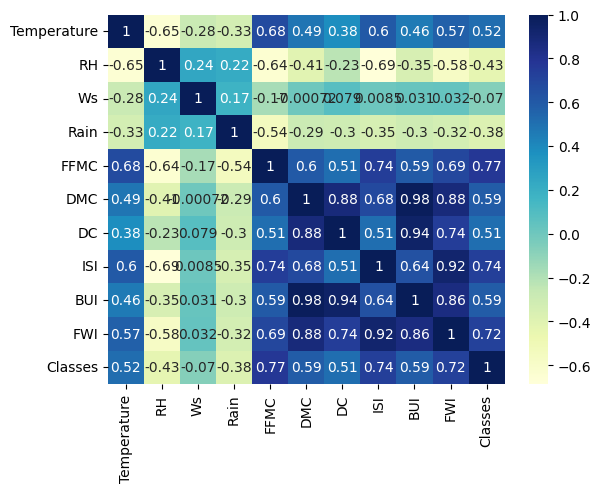

In [3]:
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
vif=pd.DataFrame()

In [6]:
vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]

In [7]:
vif['Features']=data.columns

In [8]:
print(vif)

           VIF     Features
0   107.398758  Temperature
1    31.360231           RH
2    37.132658           Ws
3     1.654660         Rain
4   128.607794         FFMC
5   185.913905          DMC
6    51.250288           DC
7    52.922827          ISI
8   406.284066          BUI
9    77.135894          FWI
10    7.122113      Classes


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
import numpy as np
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
cov_mat=data.corr()
eigenvalues,eigenvectors=eig(cov_mat)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
n_components=5
components=sorted_eigenvectors[:,:n_components]
data_pca = data_scaled.dot(components)
explained_variance_ratio = sorted_eigenvalues[:n_components] / np.sum(sorted_eigenvalues)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
cov_mat = np.cov(data_scaled, rowvar=False)
cov_mat


Explained Variance Ratio:
[0.57450362 0.14446329 0.08342408 0.07541833 0.04347601]


array([[ 1.00413223e+00, -6.54092076e-01, -2.85685550e-01,
        -3.27841064e-01,  6.79363882e-01,  4.87693894e-01,
         3.77838423e-01,  6.06365891e-01,  4.61689430e-01,
         5.69011489e-01,  5.18147782e-01],
       [-6.54092076e-01,  1.00413223e+00,  2.45056847e-01,
         2.23274903e-01, -6.47538231e-01, -4.10207284e-01,
        -2.27878893e-01, -6.89504511e-01, -3.55302699e-01,
        -5.83357394e-01, -4.33946530e-01],
       [-2.85685550e-01,  2.45056847e-01,  1.00413223e+00,
         1.72214884e-01, -1.67236489e-01, -7.23952968e-04,
         7.94615165e-02,  8.56694401e-03,  3.15683226e-02,
         3.25015238e-02, -7.02527388e-02],
       [-3.27841064e-01,  2.23274903e-01,  1.72214884e-01,
         1.00413223e+00, -5.46153735e-01, -2.89966203e-01,
        -2.99254581e-01, -3.48919813e-01, -3.01090580e-01,
        -3.25762144e-01, -3.80663682e-01],
       [ 6.79363882e-01, -6.47538231e-01, -1.67236489e-01,
        -5.46153735e-01,  1.00413223e+00,  6.06101887e-01,
  

In [10]:
data=data.drop(['DMC','DC','RH','Rain'],axis=1)

In [11]:
data

,Temperature,Ws,FFMC,ISI,BUI,FWI,Classes
0,29,18,65.7,1.3,3.4,0.5,0
1,29,13,64.4,1.0,3.9,0.4,0
2,26,22,47.1,0.3,2.7,0.1,0
3,25,13,28.6,0.0,1.7,0.0,0
4,27,16,64.8,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...
238,30,14,85.4,4.5,16.9,6.5,1
239,28,15,41.1,0.1,6.2,0.0,0
240,27,29,45.9,0.4,3.4,0.2,0
241,24,18,79.7,1.7,5.1,0.7,0


In [12]:
x=data.drop('Classes',axis=1)
y=data['Classes']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [14]:
x_train.shape ,x_test.shape

((170, 6), (73, 6))

In [15]:
x_train.corr()

,Temperature,Ws,FFMC,ISI,BUI,FWI
Temperature,1.000000,-0.328990,0.694191,0.632219,0.506965,0.616812
Ws,-0.328990,1.000000,-0.172221,-0.019689,0.015806,0.000877
FFMC,0.694191,-0.172221,1.000000,0.730628,0.601723,0.695441
ISI,0.632219,-0.019689,0.730628,1.000000,0.628034,0.922909
BUI,0.506965,0.015806,0.601723,0.628034,1.000000,0.843338
FWI,0.616812,0.000877,0.695441,0.922909,0.843338,1.000000


In [16]:
scaler=StandardScaler()

In [17]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt=DecisionTreeClassifier()

In [21]:
dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

0.9863013698630136
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        44

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73



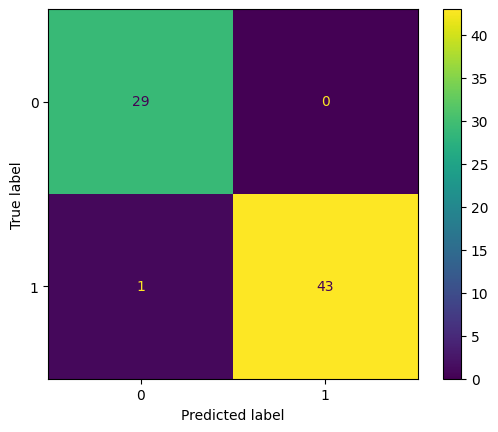

In [22]:
dt_y_predit=dt.predict(x_test_scaled)
acc_dt=accuracy_score(y_test,dt_y_predit)
print(acc_dt)
cr = classification_report(y_test,dt_y_predit)
print(cr)
rc_conf=ConfusionMatrixDisplay.from_estimator(dt,x_test_scaled,y_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier

0.9726027397260274


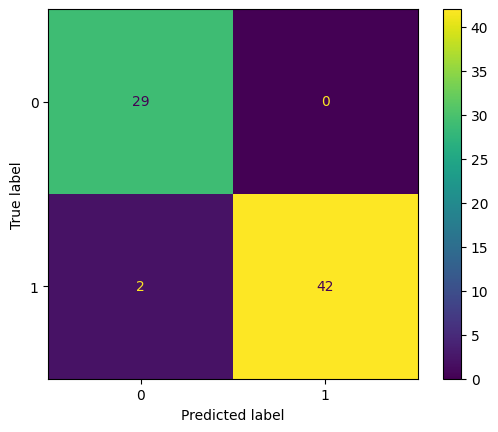

In [24]:
rc=RandomForestClassifier()
rc.fit(x_train_scaled,y_train)
rc_pred=rc.predict(x_test_scaled)
acc_rc=accuracy_score(y_test,rc_pred)
print(acc_rc)
rc_conf=ConfusionMatrixDisplay.from_estimator(rc,x_test_scaled,y_test)

0.9726027397260274
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.95      1.00      0.98        42

    accuracy                           0.97        73
   macro avg       0.98      0.97      0.97        73
weighted avg       0.97      0.97      0.97        73



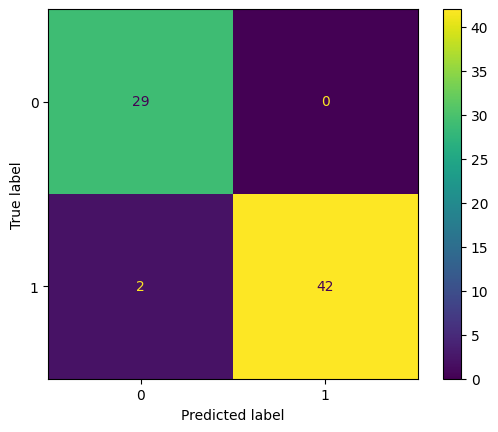

In [25]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train_scaled,y_train)
xgb_y=xgb.predict(x_test_scaled)
xgb_acc=accuracy_score(xgb_y,y_test)
xgb_cl=classification_report(xgb_y,y_test)
print(xgb_acc)
print(xgb_cl)
xgb_con=ConfusionMatrixDisplay.from_estimator(xgb,x_test_scaled,y_test)

In [26]:
imp_f=xgb.feature_importances_
i_df=pd.DataFrame({"feature":x_train.columns,"importance":imp_f}).sort_values("importance",ascending=False)
i_df

,feature,importance
3,ISI,0.653568
2,FFMC,0.263988
5,FWI,0.067784
4,BUI,0.011209
1,Ws,0.003038
0,Temperature,0.000412


In [27]:
x_train_new_scaled=scaler.fit_transform(x_train)
x_test_new_scaled=scaler.fit_transform(x_test)

In [28]:
xgb_model =xgb.fit(x_train_new_scaled, y_train)
xgb_model.score(x_test_new_scaled, y_test)
xgb_model_pred = xgb_model.predict(x_test_new_scaled)
cr = classification_report(y_test, xgb_model_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.95      0.98        44

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



In [29]:
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")


Number of duplicate rows: 0


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Confusion Matrix:
[[30  2]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.95      0.98      0.96        41

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73



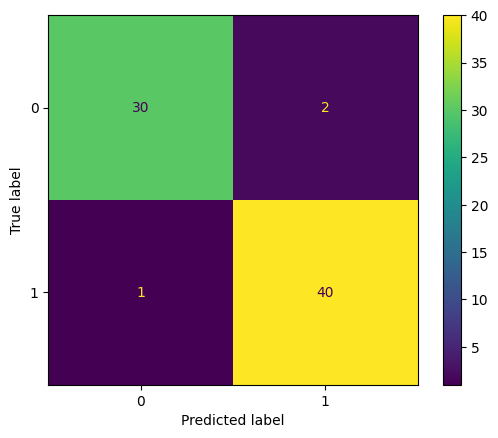

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm',  SVC(probability=True))
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}
grid = GridSearchCV(
    pipeline, param_grid, cv=5, verbose=2, n_jobs=-1, scoring='accuracy'
)

# Fit the model
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Predictions
y_pred = grid.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
SVC_CON=ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test)

In [31]:
from sklearn.inspection import permutation_importance

# Ensure the model has been fitted
# grid.fit(X_train, y_train)  # Already fitted earlier

# Compute permutation feature importance
result = permutation_importance(
    grid, X_test, y_test, n_repeats=30, random_state=42, scoring='accuracy'
)

# Create a DataFrame for visualization
i_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values("importance_mean", ascending=False)

print(i_df)


       feature  importance_mean  importance_std
2         FFMC         0.119635        0.041690
3          ISI         0.111416        0.044702
5          FWI         0.068950        0.030730
4          BUI         0.009132        0.008168
0  Temperature         0.005936        0.010423
1           Ws        -0.012329        0.016721


import pickle
with open('svc.pkl', 'wb') as f:
    pickle.dump(grid, f)

<Axes: >

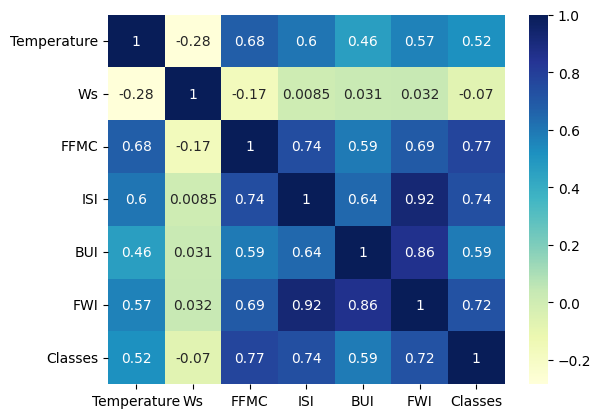

In [32]:
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

In [37]:
new_data_multiple = {
    'Temperature': [25, 22, 30],
    'Ws': [15, 45, 25],
    'FFMC': [20, 71, 85],
    'ISI': [7, 10, 12],
    'BUI': [0, 45, 55],
    'FWI':[3,42,17]
}
new_inputs = pd.DataFrame(new_data_multiple)

predictions = grid.predict(new_inputs)
y_prob = grid.best_estimator_.predict_proba(new_inputs)

print("\nPredictions for multiple inputs:")
print(predictions)
print((y_prob*100).astype(int))




Predictions for multiple inputs:
[0 1 1]
[[99  0]
 [ 0 99]
 [ 0 99]]
